<a href="https://drive.google.com/drive/folders/176VLvhLVMz4-ZFKh1uHpCijZJfQWd-6w?usp=sharing">Link to the dataset</a>


<blockquote>
Utility function declaration
</blocquote>

In [1]:
# input: Pandas DataFrame named data
# output: print a summary of the passing Pandas DataFrame 
def printSummary(data):
    print('Number of objects = {}'.format(data.shape[0]))
    print('Number of attributes = {}'.format(data.shape[1]))
    print('   | Column                      | Missing values | Infinity values')
    print('-------------------------------------------------------------------')
    i = 0
    for col_label in data.columns:
        print('{0:2d} | {1:27s} | {2:14d} | {3:15d}'.format(i, col_label, data[col_label].isnull().sum(), data[col_label].isin([np.inf]).sum()))
        i = i + 1
    print('-------------------------------------------------------------------')

# 1. Data cleaning 

In [2]:
import pandas as pd
import numpy as np
import warnings
# suppress the warning caused by setting the first column as index column
warnings.simplefilter(action='ignore', category=FutureWarning) 
data = pd.read_csv('cic2017-ddos-data.csv', index_col=0, header=0)
# dataset contains infinite values in some columns
data = data.replace('inf', np.inf)

print('Dataset before cleaning:')
printSummary(data)
print('Label column information:')
print(data.loc[:, 'Label'].describe())

Dataset before cleaning:
Number of objects = 755663
Number of attributes = 85
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | Flow Duration               |              0 |               0
 8 | Total Fwd Packets           |              0 |               0
 9 | Total Backward Packets      |              0 |               0
10 | Total Length of Fwd Packets |              0 |               0
11 | Total Length of Bwd Packets |    

In [3]:
data = data.replace(np.nan, np.inf)
data['Flow Bytes/s'].replace(np.inf, data['Flow Bytes/s'].median(), inplace=True)
data['Flow Packets/s'].replace(np.inf, data['Flow Packets/s'].median(), inplace=True)

print('Dataset after cleaning:')
printSummary(data)

Dataset after cleaning:
Number of objects = 755663
Number of attributes = 85
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | Flow Duration               |              0 |               0
 8 | Total Fwd Packets           |              0 |               0
 9 | Total Backward Packets      |              0 |               0
10 | Total Length of Fwd Packets |              0 |               0
11 | Total Length of Bwd Packets |     

# 2. Data preprocessing

In [4]:
print('Number of matching values of two columns \"Fwd Header Length\" and \"Fwd Header Length - dupl\": {}'.format(data['Fwd Header Length'].eq(data['Fwd Header Length - dupl']).sum()))
# drop two duplicated columns
data = data.drop(['Fwd Header Length - dupl'], axis=1)
print('Dataset after dropping duplicated column: ')
print('Number of instances = {}'.format(data.shape[0]))
print('Number of attributes = {}'.format(data.shape[1]))

Number of matching values of two columns "Fwd Header Length" and "Fwd Header Length - dupl": 755663
Dataset after dropping duplicated column: 
Number of instances = 755663
Number of attributes = 84


In [5]:
from sklearn.decomposition import PCA

numInstances = data.shape[0]
numComponents = 10
pca = PCA(n_components=numComponents)
pca.fit(data.loc[:, 'Flow Duration':'Idle Min'])

projected = pca.transform(data.loc[:, 'Flow Duration':'Idle Min'])
projected = pd.DataFrame(projected,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=range(numInstances))
projected.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.408698e+07,535254.149989,1.453473e+06,902919.373947,-355285.291540,171524.876162,-327207.474978,-4822.703717,-770.486466,-124251.621971
1,-2.418045e+07,590354.229423,1.046009e+07,855603.211236,-344858.757347,166728.122664,-320211.333373,-6069.927038,-1159.470758,-123116.750996
2,-2.418045e+07,590354.229423,1.046009e+07,855603.211236,-344858.757347,166728.122664,-320211.333373,-6069.927038,-1159.470758,-123116.750996
3,-2.418045e+07,590354.229423,1.046009e+07,855603.211236,-344858.757347,166728.122664,-320211.333373,-6069.927038,-1159.470758,-123116.750996
4,-2.409737e+07,541376.130439,2.454209e+06,897662.006552,-354127.868235,170991.814487,-326431.142567,-4961.289162,-813.706743,-124125.445610
5,-2.418045e+07,590354.237740,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360792,-6069.926941,-1159.470240,-123116.735206
6,-2.418045e+07,590354.237740,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360792,-6069.926941,-1159.470240,-123116.735206
7,-2.418045e+07,590354.237740,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360792,-6069.926941,-1159.470240,-123116.735206
8,-2.406981e+07,525823.842928,-7.425198e+04,910603.316790,-357069.962224,172771.801627,-328173.231498,-3890.344399,-922.235133,-124387.558512
9,-2.409601e+07,547006.832824,2.682668e+06,888217.027011,-355215.754222,175465.325020,-331051.054511,2589.154085,-2147.366978,-138906.343268


In [6]:
from sklearn.model_selection import train_test_split

new = pd.concat([data.iloc[:, 0:7], projected, data.iloc[:, 83]], axis=1)
print('Dataset after performing PCA:')
printSummary(new)

y = new.loc[:, 'Label']
x = new.drop(['Label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print('Number of objects in training set: {}'.format(x_train.shape[0]))
print('Number of objects in testing set:  {}'.format(x_test.shape[0]))

Dataset after performing PCA:
Number of objects = 755663
Number of attributes = 18
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | PC1                         |              0 |               0
 8 | PC2                         |              0 |               0
 9 | PC3                         |              0 |               0
10 | PC4                         |              0 |               0
11 | PC5                         

# 3. Data mining
## Decision tree

Text(0, 0.5, 'Accuracy')

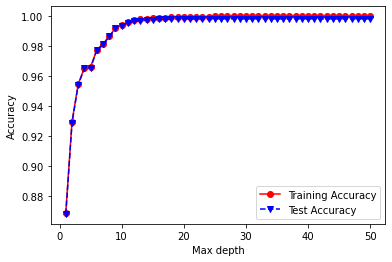

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot

maxDepth = np.arange(1, 51)
trainAccuracy = np.zeros(50)
testAccuracy = np.zeros(50)
for i in range(1, 51):    
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepth[i - 1])
    clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

    y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
    trainAccuracy[i - 1] = accuracy_score(y_train, y_pred_train)
    y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
    testAccuracy[i - 1] = accuracy_score(y_test, y_pred)

plot.plot(maxDepth, trainAccuracy,'ro-', maxDepth,testAccuracy,'bv--')
plot.legend(['Training Accuracy', 'Test Accuracy'])
plot.xlabel('Max depth')
plot.ylabel('Accuracy')   

In [8]:
maxDepthFinal = 1
for i in range (i, 49):
    if ((np.abs(trainAccuracy[i + 1] - testAccuracy[i + 1])) < (np.abs(trainAccuracy[i] - testAccuracy[i]))):
        maxDepthFinal = i + 1
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)
y_pred = pd.Series(y_pred, name='Predicted Class')
y_pred.index = x_test.index
predictions = pd.concat([x_test, y_pred, y_test], axis=1)
print('Max Depth = {}'.format(maxDepthFinal))
print('Accuracy on training data is {}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy on testing data is  {}'.format(accuracy_score(y_test, y_pred)))    
predictions.head(30)

Max Depth = 1
Accuracy on training data is 0.9999981095121785
Accuracy on testing data is  0.9982796571665512


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Predicted Class,Label
253617,192.168.10.1-192.168.10.3-53-61486-17,192.168.10.3,61486,192.168.10.1,53,17,03/07/2017 02:31:07,-2.403078e+07,5.205468e+05,-1.540959e+06,9.104410e+05,-3.403417e+05,1.745779e+05,-2.994690e+05,-3358.068004,-595.865457,-1.365523e+05,BENIGN,BENIGN
208116,192.168.10.19-94.75.239.5-56047-443-6,192.168.10.19,56047,94.75.239.5,443,6,03/07/2017 01:31:33,-2.405552e+07,5.169600e+05,-1.548679e+06,9.186988e+05,-3.584663e+05,1.731518e+05,-3.292753e+05,-4405.037328,-661.907910,-1.246633e+05,BENIGN,BENIGN
411534,192.168.10.3-192.168.10.9-53-54173-17,192.168.10.9,54173,192.168.10.3,53,17,03/07/2017 02:19:36,-2.406625e+07,5.232585e+05,-5.140253e+05,9.131043e+05,-3.574422e+05,1.725771e+05,-3.285866e+05,-4229.645907,-758.488585,-1.243300e+05,BENIGN,BENIGN
523121,192.168.10.3-192.168.10.8-53-61462-17,192.168.10.8,61462,192.168.10.3,53,17,03/07/2017 02:13:18,-2.407482e+07,5.282782e+05,3.110578e+05,9.087679e+05,-3.564849e+05,1.721098e+05,-3.278461e+05,-4328.653756,-812.820930,-1.240223e+05,BENIGN,BENIGN
6692,172.217.3.110-192.168.10.5-80-49365-6,192.168.10.5,49365,172.217.3.110,80,6,03/07/2017 09:19:08,1.867082e+08,-2.448322e+07,1.020038e+06,5.415115e+07,1.386413e+07,-3.239341e+06,9.557773e+06,52179.846514,-161503.265780,-8.876337e+06,BENIGN,BENIGN
437054,192.168.10.3-192.168.10.12-53-5324-17,192.168.10.12,5324,192.168.10.3,53,17,03/07/2017 10:40:16,-2.392787e+07,5.382811e+05,-1.546079e+06,8.764727e+05,-3.044433e+05,1.789326e+05,-3.015327e+05,-3373.705101,-790.602986,-1.249092e+05,BENIGN,BENIGN
572969,151.101.0.166-192.168.10.15-443-59023-6,151.101.0.166,443,192.168.10.15,59023,6,7/7/2017 3:59,-2.405688e+07,5.178399e+05,-1.402435e+06,9.177785e+05,-3.583480e+05,1.730790e+05,-3.292543e+05,-4432.172991,-673.951377,-1.244207e+05,BENIGN,BENIGN
364173,192.168.10.3-192.168.10.51-53-57744-17,192.168.10.51,57744,192.168.10.3,53,17,03/07/2017 12:25:05,-2.402906e+07,5.214469e+05,-1.537222e+06,9.097719e+05,-3.473813e+05,1.743926e+05,-3.237333e+05,-3828.546228,-660.292752,-1.248112e+05,BENIGN,BENIGN
194824,192.168.10.25-54.183.252.153-59915-443-6,54.183.252.153,443,192.168.10.25,59915,6,03/07/2017 01:03:13,-2.418299e+07,5.922545e+05,1.078675e+07,8.534793e+05,-3.441088e+05,1.663389e+05,-3.187674e+05,-5986.185299,-1691.412547,-1.210678e+05,BENIGN,BENIGN
126332,192.168.10.25-104.24.11.90-61310-443-6,104.24.11.90,443,192.168.10.25,61310,6,03/07/2017 11:33:39,-2.405549e+07,5.171148e+05,-1.520231e+06,9.184490e+05,-3.582623e+05,1.731215e+05,-3.291669e+05,-4399.459382,-642.222122,-1.246567e+05,BENIGN,BENIGN


# 4. Data visualization

<AxesSubplot:>

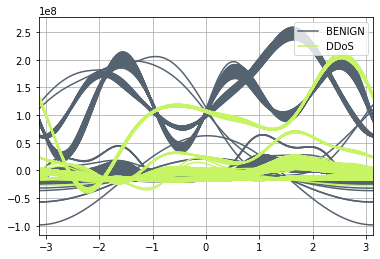

In [9]:
# parallel coordinates plot
# pd.plotting.parallel_coordinates(new.loc[600000:610000, 'PC1':'Label'], 'Label', color=('#556270', '#C7F464'))
pd.plotting.andrews_curves(new.loc[600000:605000, 'PC1':'Label'], 'Label', color=('#556270', '#C7F464'))